## <center> Аттестация. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} - x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [162]:
df = pd.read_csv('data/solarpower.csv')

In [163]:
# Создаем датафрейм с пропусками и создаем список с индексами этих строк
df_empty = df[df['cum_power'] == -1]
list_val = df_empty.index.values

# Для каждой из строк ищем среднее арифметическое между соседними строками и переприсваем новые значения в исходном датафрейме
for val in list_val:
    val_prev = df.iloc[val - 1][1]
    val_next = df.iloc[val + 1][1]
    val_new = (val_prev + val_next) / 2
    
    df['cum_power'].iloc[val] = val_new

# Проверяем, что пропущенных значений не осталось:
df[df['cum_power'] == -1]['cum_power'].count() 

/home/konstantin/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [164]:
df['day_power'] = df['cum_power'].diff()

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

power_by_months = df.groupby('month')['day_power'].sum()

3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

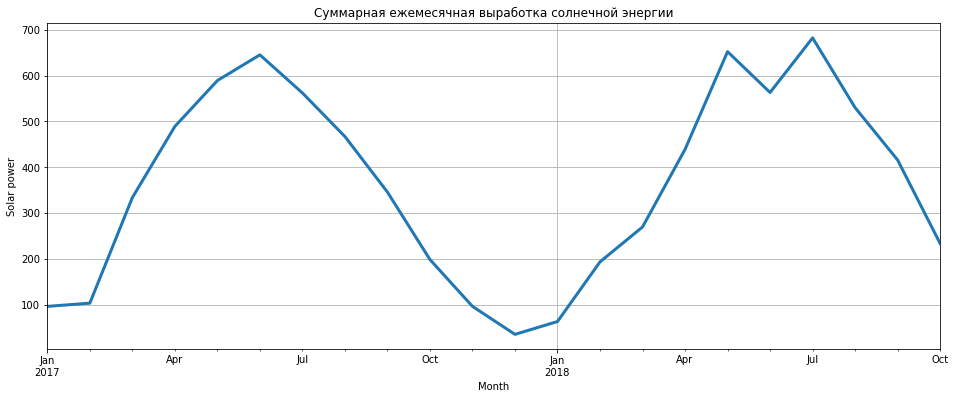

In [165]:
power_by_months.plot(
    kind='line',
    figsize=(16,6),
    title='Суммарная ежемесячная выработка солнечной энергии',
    grid=True,
    lw=3,
    xlabel='Month',
    ylabel='Solar power'
);

### По графику видно, что примерно с января до июня выработка энергии возрастает (максимум в июне-июле) и далее до конца года постепенно падает (минимум в декабре-январе)